In [99]:
#import useful libraries 
import pandas as pd
import json
import sys
import requests
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
%matplotlib inline 

from data_loader import *
%load_ext autoreload
%autoreload 2


##link to the datasets
##https://www.cs.cmu.edu/~ark/personas/
##https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?resource=download&select=movies_metadata.csv
##https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset
##https://www.kaggle.com/datasets/unanimad/the-oscar-award/data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
df_character = load_character().copy()
df_movie = load_movie().copy()
df_name_cluster = load_name_cluster().copy()
df_summary = load_plot_summary().copy()
df_tropes_cluster = load_tropes_cluster().copy()

In [76]:
df_movie.shape

(81741, 12)

In [77]:
# Replace 'id-translation.wikidata.json' with the path to your JSON file
file_path = 'id-translation.wikidata.json'

# Load the JSON file into a DataFrame
df_id_translation = pd.read_json(file_path, orient='records', lines=True)

# Display the loaded DataFrame
display(df_id_translation)

,tconst,Freebase ID
0,nm0010930,/m/0282x
1,nm0124133,/m/09b6zr
2,nm0684496,/m/014d3
3,nm0061667,/m/01rgr
4,tt1675434,/m/0hgqwpj
...,...,...
990440,tt20913312,None
990441,tt29623578,None
990442,nm1456284,None
990443,tt27348595,None


In [78]:
df_id_translation = df_id_translation.dropna(subset=['Freebase ID'])
#df_id_translation.drop_duplicates(subset=['Freebase ID'], keep='first', inplace=True)
print(df_id_translation.shape)

(397518, 2)


In [79]:
df_id_translation.drop_duplicates(subset=['Freebase ID'], keep='first', inplace=True)
print(df_id_translation.shape)

(396337, 2)


In [80]:
df_movie = pd.merge(df_movie, df_id_translation, on='Freebase ID', how='left')
display(df_movie)

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24,tt0228333
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,2,16,tt0245916
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,<NA>,<NA>,tt0094806
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,<NA>,<NA>,tt0094320
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,<NA>,<NA>,tt0083949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,3,19,tt1816585
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,1,21,tt1606259
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9,22,tt0362411
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,5,21,tt0113726


In [82]:
df_kaggle_movie = load_movie_kaggle()

#merge the datasets on the 'Name', 'Year' and 'tconst' columns
df_movie = df_movie.merge(df_kaggle_movie[['Name', 'Year', 'tconst', 'Month', 'Day']], on=['Name', 'Year','tconst'], how='left', suffixes=('', '_df2'))

#use 'combine_first' to fill in the 'Box office' values from df_kaggle_movie where they are NaN in df_movie
df_movie['Month'] = df_movie['Month'].combine_first(df_movie['Month_df2'])
df_movie['Day'] = df_movie['Day'].combine_first(df_movie['Day_df2'])

#drop the extra 'Box office' column from df_kaggle_movie
df_movie.drop('Month_df2', axis=1, inplace=True)
df_movie.drop('Day_df2', axis=1, inplace=True)

df_movie = df_movie.drop_duplicates(subset='Wikipedia ID', keep='first')

display(df_movie)

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24,tt0228333
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,2,16,tt0245916
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,<NA>,<NA>,tt0094806
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,<NA>,<NA>,tt0094320
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,<NA>,<NA>,tt0083949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81752,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,3,19,tt1816585
81753,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,1,21,tt1606259
81754,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9,22,tt0362411
81755,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,5,21,tt0113726


In [96]:
df_movie_PCA = df_movie.dropna(subset=['Year','Month','Day'])
df_movie_PCA = df_movie_PCA.reset_index(drop=True)

# Combine "Year," "Month," and "Day" into a datetime column
df_movie_PCA['Release_Date'] = pd.to_datetime(df_movie_PCA[['Year', 'Month', 'Day']], errors='coerce')

# Extract the week number using the dt accessor
df_movie_PCA['Week_Number'] = df_movie_PCA['Release_Date'].dt.strftime('%V')

# Handle NaN values and convert to integer
df_movie_PCA['Week_Number'] = pd.to_numeric(df_movie_PCA['Week_Number'], errors='coerce').astype('Int64')

# Display the resulting DataFrame
print(df_movie_PCA)

       Wikipedia ID Freebase ID  \
0            975900   /m/03vyhn   
1           3196793   /m/08yl5d   
2          13696889  /m/03cfc81   
3          10408933  /m/02qc0j7   
4           6631279   /m/0gffwj   
...             ...         ...   
46670      32468537  /m/0crwd9y   
46671      35228177  /m/0j7hxnt   
46672      34980460  /m/0g4pl34   
46673       9971909  /m/02pygw1   
46674        913762   /m/03pcrp   

                                                    Name Release date  \
0                                         Ghosts of Mars   2001-08-24   
1      Getting Away with Murder: The JonBenét Ramsey ...   2000-02-16   
2                                          The Gangsters   1913-05-29   
3                               Alexander's Ragtime Band   1938-08-16   
4                                            Little city   1997-04-04   
...                                                  ...          ...   
46670                                    Shadow Boxing 2   2007-10-1

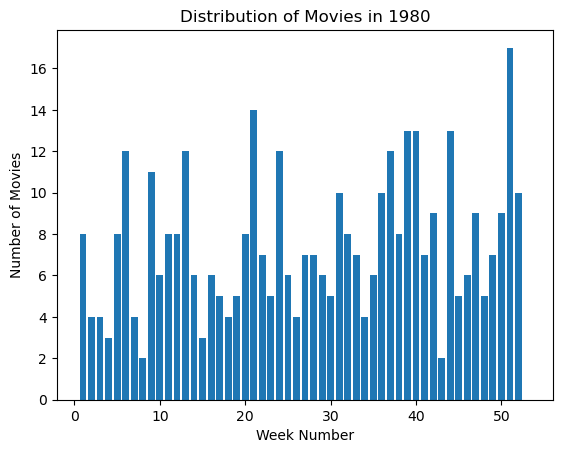

In [121]:
# Count the number of movies for each combination of Year and Week_Number
movie_count_df = df_movie_PCA.groupby(['Year', 'Week_Number']).size().reset_index(name='Movie_Count')

# Pivot the DataFrame to create the desired array
movie_array = movie_count_df.pivot(index='Year', columns='Week_Number', values='Movie_Count').fillna(0).astype(int)

# Display the resulting movie_array

movie_array = movie_array[(movie_array.index >= 1980) & (movie_array.index <= 2011)]


selected_year = 1980
# Extract the row for the selected year
selected_year_row = movie_array.loc[selected_year]

# Plot a histogram
plt.bar(selected_year_row.index, selected_year_row)
plt.xlabel('Week Number')
plt.ylabel('Number of Movies')
plt.title(f'Distribution of Movies in {selected_year}')
plt.show()

<Axes: >

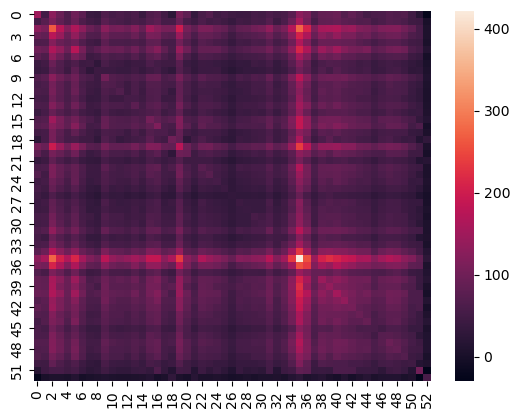

In [106]:
cov_matrix = np.cov(movie_array.T)
sns.heatmap(cov_matrix)

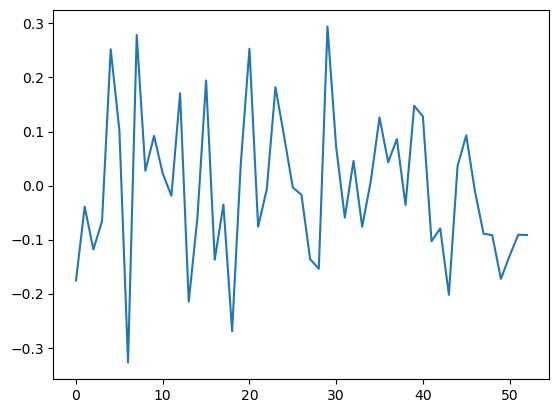

In [143]:
U, S, VT = np.linalg.svd(cov_matrix)

nb_comp = 4 # Pick the top 'nb_comp' components of SVD and project the data matrix onto them

U_top = U[:, :nb_comp]
S_top = np.diag(S[:nb_comp])
VT_top = VT[:nb_comp, :]

projected_data = np.dot(movie_array, U_top)
main_variations = np.dot(projected_data, U_top.T)

plt.plot(-U[:,12])

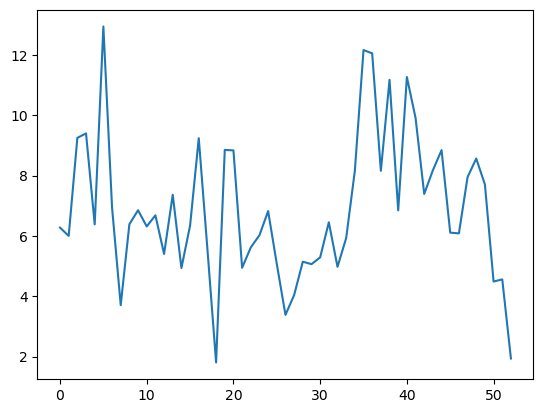

In [144]:
plt.plot(main_variations[0])

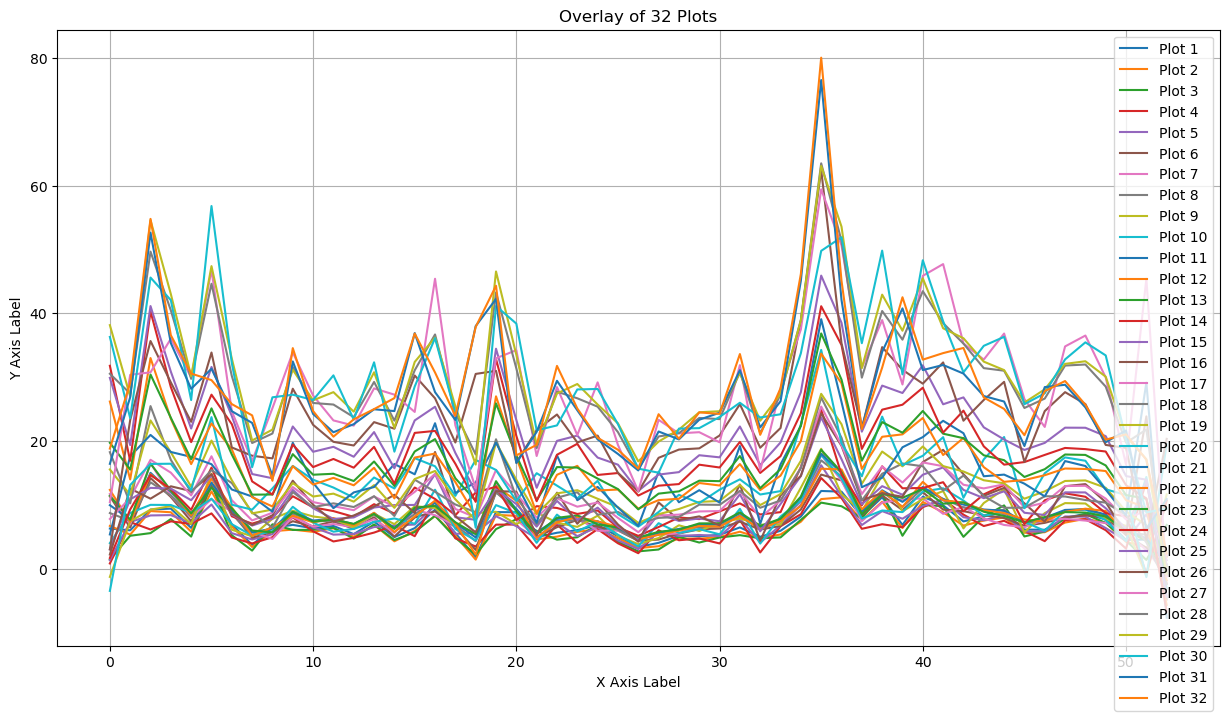

In [148]:
# Create a single set of axes
fig, ax = plt.subplots(figsize=(15, 8))

# Plot each array on the same axes
for i, array in enumerate(main_variations):
    ax.plot(main_variations[i], label=f'Plot {i + 1}')

# Add labels and title
ax.set_xlabel('X Axis Label')
ax.set_ylabel('Y Axis Label')
ax.set_title('Overlay of 32 Plots')

# Add a legend
ax.legend()
ax.grid(which='both')
# Show the plot
plt.show()